In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os

# Visualization settings
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Loading the data
PROCESSED_DATA_PATH = '../data/processed/final_data.parquet'
df_full = pd.read_parquet(PROCESSED_DATA_PATH)

# Applying the same filters as the model for a consistent analysis
df = df_full.query("`ds_mod_concorrencia` == 'AMPLA CONCORRÊNCIA' and `qt_vagas_concorrencia` >= 10").copy()

print(f"Dataset for analysis loaded with {len(df)} rows.")

Dataset for analysis loaded with 40446 rows.


In [6]:
df.tail()

,edicao,co_ies,no_ies,sg_ies,no_campus,co_curso,no_curso,ds_grau,ds_turno,ds_mod_concorrencia,qt_vagas_concorrencia,nu_notacorte,qt_inscricao,chave_curso,nota_edicao_anterior,vagas_edicao_anterior,tendencia_nota,inscritos_edicao_anterior,demanda_anterior
349894,2021_1,9,UNIVERSIDADE ESTADUAL DE LONDRINA,UEL,UEL - CAMPUS UNIVERSITÁRIO,92260,PEDAGOGIA,LICENCIATURA,NOTURNO,AMPLA CONCORRÊNCIA,11.0,621.88,82.0,9_92260_LICENCIATURA_NOTURNO,614.56,11.0,-33.52,147.0,12.250000
349895,2022_1,9,UNIVERSIDADE ESTADUAL DE LONDRINA,UEL,UEL - CAMPUS UNIVERSITÁRIO,92260,PEDAGOGIA,LICENCIATURA,NOTURNO,AMPLA CONCORRÊNCIA,10.0,616.90,87.0,9_92260_LICENCIATURA_NOTURNO,621.88,11.0,7.32,82.0,6.833333
349896,2023_1,9,UNIVERSIDADE ESTADUAL DE LONDRINA,UEL,UEL - CAMPUS UNIVERSITÁRIO,92260,PEDAGOGIA,LICENCIATURA,NOTURNO,AMPLA CONCORRÊNCIA,14.0,622.48,131.0,9_92260_LICENCIATURA_NOTURNO,616.90,10.0,-4.98,87.0,7.909091
349897,2024,9,UNIVERSIDADE ESTADUAL DE LONDRINA,UEL,UEL - CAMPUS UNIVERSITÁRIO,92260,PEDAGOGIA,LICENCIATURA,NOTURNO,AMPLA CONCORRÊNCIA,14.0,615.72,123.0,9_92260_LICENCIATURA_NOTURNO,622.48,14.0,5.58,131.0,8.733333
349898,2025,9,UNIVERSIDADE ESTADUAL DE LONDRINA,UEL,UEL - CAMPUS UNIVERSITÁRIO,92260,PEDAGOGIA,LICENCIATURA,NOTURNO,AMPLA CONCORRÊNCIA,14.0,623.64,278.0,9_92260_LICENCIATURA_NOTURNO,615.72,14.0,-6.76,123.0,8.200000


## What is the Overall Distribution of Cutoff Scores?

**Hypothesis:** Most cutoff scores for General Admission should be concentrated in a central range, likely between 550 and 750 points, with a tail extending to higher scores for high-demand courses.

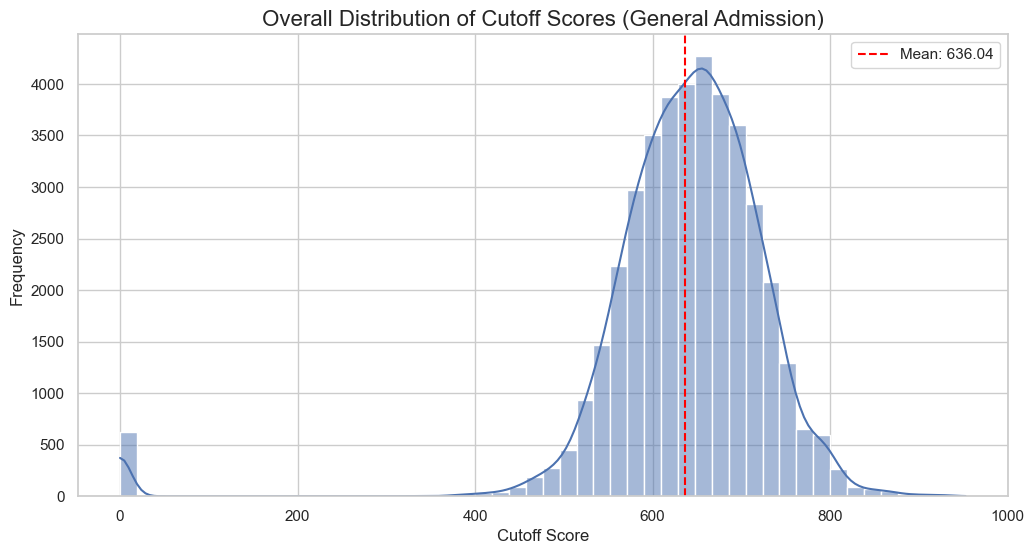

In [2]:
plt.figure(figsize=(12, 6))
sns.histplot(df['nu_notacorte'], kde=True, bins=50)

mean_score = df['nu_notacorte'].mean()
plt.axvline(mean_score, color='red', linestyle='--', label=f'Mean: {mean_score:.2f}')

plt.title('Overall Distribution of Cutoff Scores (General Admission)', fontsize=16)
plt.xlabel('Cutoff Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()

### Conclusion

The hypothesis is confirmed. The histogram shows a distribution resembling a normal distribution, with a clear peak around the mean of **636 points**. We observe that the vast majority of cutoff scores for General Admission are between 500 and 750 points. The right tail, although small, indicates the presence of highly competitive courses.

## How Have Cutoff Scores Evolved Over Time?

**Hypothesis:** High-demand courses, like Medicine, should show stable scores at a high level. Technology courses might show an upward trend, reflecting the heating up of the tech sector. Other courses might exhibit more volatility.

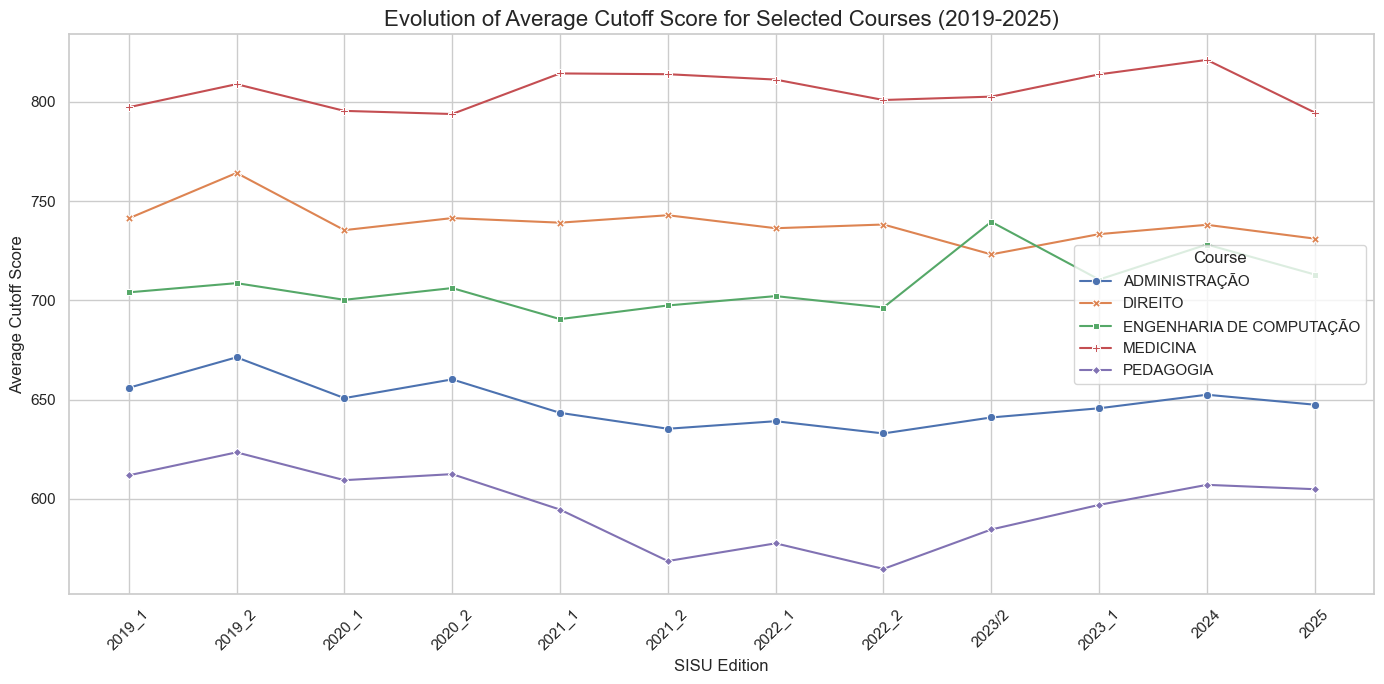

In [5]:
# Selecting some courses of interest for the time-series analysis
courses_to_analyze = ['MEDICINA', 'DIREITO', 'ENGENHARIA DE COMPUTAÇÃO', 'ADMINISTRAÇÃO', 'PEDAGOGIA']
df_temporal = df[df['no_curso'].isin(courses_to_analyze)]

# Calculating the mean cutoff score by course and by year
mean_score_by_year = df_temporal.groupby(['edicao', 'no_curso'])['nu_notacorte'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=mean_score_by_year, x='edicao', y='nu_notacorte', hue='no_curso', style='no_curso', markers=True, dashes=False)

plt.title('Evolution of Average Cutoff Score for Selected Courses (2019-2025)', fontsize=16)
plt.xlabel('SISU Edition', fontsize=12)
plt.ylabel('Average Cutoff Score', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Course')
plt.tight_layout()
plt.show()

### Conclusion

The line plot reveals the following trends.
- **Medicine** and **Law** show great stability at high levels, confirming they are established careers with constant high demand.
- **Computer Engineering** shows a clear upward trend over the years, which validates the hypothesis that the demand for tech professionals is growing and is reflected in the SISU's competitiveness.
- **Administration** and **Pedagogy** show more volatility and are situated in a lower cutoff score range, but are still competitive.